<a href="https://colab.research.google.com/github/mabdulghofur142/Data-Mining/blob/main/Final%20Project/Capstone_Project_02_(Final_Project)_Group_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Capstone Project 02 (Final Project) - Group H***

| NIM | Nama | Deskripsi |
| -------- | -------- | -------- |
|11210940000073   | Tonny Pramudya Bagus Santoso | Mencari StopWords, Presentasi|
|11220940000020  | Muhammad Abdul Ghofur |Scrapping, Mencari StopWords, Normalisasi Data Teks, Labelling, Visualisasi, Interpretassi|
|11220940000047   | Rajwaa Warda Yunenda Putri      |Mencari StopWords, Visualisasi, PPT, dan Interpretasi|
|11220940000052   | Tsabita Salma    |Labelling Sentimen, PPT, dan Interpretasi|
|11220940000075   | Raden Arinal Haque |Labelling Sentimen, Presentasi|


## Latar Belakang

Pada bulan September, saat Timnas Indonesia mulai berlaga di babak ketiga kualifikasi Piala dunia 2026, isu naturalisasi pemain menjadi perbincangan hangat. Kebijakan ini bertujuan meningkatkan performa tim keturunan sebagai Warga Negara Indonesia (WNI).


Meskipun dianggap strategis untuk meningkatkan kualitas permainan, naturalisasi memicu pro dan kontra. Sebagian mendukungnya sebagai upaya mendongkrak prestasi, sementara yang lain mengkritik karena dianggap mengabaikan pembinaan pemain lokal.


Diskusi ini ramai di Twitter (X), mencerminkan opini publik yang beragam. Analisis sentimen terhadap percakapan ini dapat memberikan wawasan penting bagi pemangku kebijakan untuk menyusun strategi sepak bola nasional yang lebih baik.

## Rumusan Masalah

**Permasalahan**
1. Apa isu-isu utama yang terkait dengan Naturalisasi Pemain Timnas Indonesia?
2. Bagaimana sentimen publik terhadap Naturalisasi Pemain Timnas Indonesia?
3. Bagaimana  pola percakapan tentang hal ini di media sosial?
4. Bagaimana respons netizen terhadap Naturalisasi Pemain Timnas Indonesia?

**Periode Pengumpulan Data**

1-30 September 2024

**Sumber Data**

Twitter (X)

**Kata Kunci**
* naturalisasi bola indonesia
* naturalisasi timnas indonesia
* pemain keturunan indonesia

## Packages

In [4]:
!pip install Sastrawi
!pip install unidecode
!pip install textblob
!python -m textblob.download_corpora
!pip install wordcloud matplotlib
!pip install squarify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.8 MB/s eta 0:00:00
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [5]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from html import unescape
import pandas as pd
from unidecode import unidecode # Import the unidecode function
from textblob import TextBlob # Import the TextBlob class
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import requests
import json
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from wordcloud import WordCloud
import re, operator, numpy as np
from tqdm import tqdm
from collections import Counter
import squarify



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Mempersiapkan Data

## Scrapping Data Twitter (X)

Pada Proses Scrapping data dari twitter kami menggunakan library tweet-harvest dari Helmi Satria pada sumber link berikut:
- https://helmisatria.com/blog/crawl-data-twitter-menggunakan-tweet-harvest/
- https://colab.research.google.com/drive/1jQhAGKanGZ290rIaf06705xmhAB3vpD9
- https://www.youtube.com/watch?v=OK6b5vvjRzY


```
# auth token yang dimiliki tiap pengguna twitter untuk akses
twitter_auth_token = "...." # masukkan auth token twitter di sini

# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v


## Limit 1000 tweet
limit = 1000
## berikut list keyword kami
listkey = ['naturalisasi bola indonesia',
            'naturalisasi timnas indonesia',
            'pemain keturunan indonesia']
```


Kami menggunakan 3 keyword dan melakukan beberapa kali scrapping pada tiap keyword, yakni di setiap 10 hari pada bulan september untuk memastikan semua tweet dalam bulan tersebut dapat diambil. Dengan demikian terdapat setidaknya terdapat 9 pengambilan



```
# Contoh pengambilan yang kami lakukan
## Pengambilan Keyword Pertama di 10 hari pertama bulan September
filename1 = 'naturalisasi_bola_indonesia_1.csv'
search_keyword1 = 'naturalisasi bola indonesia until:2024-09-11 since:2024-09-01'

!npx --yes tweet-harvest@2.6.1 -o "{filename1}" -s "{search_keyword1}" --tab "LATEST" -l {limit} --token {twitter_auth_token}
```




Lalu kami lakukan proses penggabungan dataframe dan Ekspor ke Github


```
import pandas as pd
import glob

# Mencari semua file CSV di dalam folder 'tweets-data'
csv_files = glob.glob('tweets-data/*.csv') # list nama file yang disimpan
csv_files.sort()  # Use the sort() method of the list object

n = 0
for filename in csv_files: ## Menggabungkan file csv dalam bentuk dataframe
  # Read the CSV file into a pandas DataFrame
  if n == 0:
    df = pd.read_csv(filename, delimiter=",")
    n = 1
  else:
    df2 = pd.read_csv(filename, delimiter=",")
    df = pd.concat([df, df2])
    n+=1

# Membuang duplikat berdasarkan id_str
df.drop_duplicates(subset=['id_str'], keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

# Ekspor Data Hasil Scrapping
from google.colab import files
namafile = "DATAX_Naturalisasi_fix.csv"
df.to_csv(namafile, index=False)
files.download(namafile)
"Exported"
```



## Import Data Hasil Scrapping

Sebelumnya pada link berikut
- https://docs.google.com/spreadsheets/d/1W2n8ny7i5A74D0c-iB-gQUG_eeaZmHEAQgixtVVokmg/edit?usp=sharing

Kami telah melakukan proses pelabelan sentimen (3:Positif, 1:Negatif, dan 2:Netral) pada setiap tweet sebelum data ini diunggah ke GitHub dan diimpor ke sini. Langkah ini dilakukan untuk mendukung analisis sentimen publik terkait topik naturalisasi Timnas Indonesia.

In [6]:
# Import data hasil scrapping twitter (X)
import pandas as pd

file_ = 'data/Data_X_Naturalisasi_Timnas_Indonesia_Sep.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_," Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/mabdulghofur142/Data-Mining/refs/heads/main/Final%20Project/Data_X_Naturalisasi_Timnas_Indonesia_Sep.csv
    df = pd.read_csv(file_)

print(df.shape)
df.sample(10)

(2537, 16)


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,sentiment
718,1836976876910424412,Fri Sep 20 03:53:11 +0000 2024,0,Beri Naturalisasi Kemenkumham Dukung Jalan Tim...,1836976876910424412,https://pbs.twimg.com/media/GX5As72aUAIBv58.jpg,NaN,in,"Bogor, Jawa Barat",0,0,0,https://x.com/Lapsuster/status/183697687691042...,1103935843901759488,Lapsuster,2
741,1836942265845264403,Fri Sep 20 01:35:39 +0000 2024,0,Beri Naturalisasi Kemenkumham Dukung Jalan Tim...,1836942265845264403,NaN,NaN,in,NaN,0,0,0,https://x.com/kilas_penjara/status/18369422658...,1678572597234270210,kilas_penjara,2
1088,1835402759132319801,Sun Sep 15 19:38:12 +0000 2024,0,Disaat timnas Indonesia lagi dalam performa ya...,1835402759132319801,NaN,NaN,in,"Kota Serang, Banten",0,0,0,https://x.com/Araaf_G/status/1835402759132319801,457507413,Araaf_G,2
1676,1839154165693690131,Thu Sep 26 04:04:57 +0000 2024,0,Dukung Pemain Naturalisasi Rano Karno: Berikan...,1839154165693690131,https://pbs.twimg.com/media/GYX88qLXYAAFUfb.jpg,NaN,in,NaN,0,1,0,https://x.com/aankjalaludin/status/18391541656...,1378243426676731905,aankjalaludin,3
515,1832616755153207380,Sun Sep 08 03:07:37 +0000 2024,0,Calon dua pemain naturalisasi Timnas Indonesia...,1832616755153207380,NaN,NaN,in,"Denpasar, Bali",0,0,0,https://x.com/nusabalicom/status/1832616755153...,2655442453,nusabalicom,2
1742,1837915782971642186,Sun Sep 22 18:04:04 +0000 2024,0,Statistik Thom Haye dan Mees Hilgers di Laga A...,1837915782971642186,https://pbs.twimg.com/media/GYGWql7boAA4Arg.jpg,NaN,in,"Pulo Gadung, Indonesia",0,0,0,https://x.com/tvOneNews/status/183791578297164...,55507370,tvOneNews,2
2037,1836222578832347443,Wed Sep 18 08:00:36 +0000 2024,0,@SiaranBolaLive Ayo pssi dan pak erik tohir ce...,1836314364682604678,NaN,SiaranBolaLive,in,palangkaraya,0,0,0,https://x.com/hatuejawa/status/183631436468260...,2866747735,hatuejawa,2
109,1836002999082381357,Thu Sep 19 00:54:49 +0000 2024,1,@ngurahsaka Gw anak abah tapi support naturali...,1836569601305645261,NaN,NaN,in,NaN,0,0,0,https://x.com/AkunFake45940/status/18365696013...,1678113290873102336,AkunFake45940,1
1010,1834532479316734072,Mon Sep 16 07:22:59 +0000 2024,0,@pinterpolitik akun bangsat ini... mau gembosi...,1835580121673285948,NaN,pinterpolitik,in,Purwokerto Banyumas,0,0,0,https://x.com/mamehebat258/status/183558012167...,209556145,mamehebat258,1
883,1836624093501964549,Thu Sep 19 04:31:21 +0000 2024,5,Kemenkumham Dukung Proses Naturalisasi Demi Ti...,1836624093501964549,NaN,NaN,in,"Kota Tegal, Jawa Tengah",0,0,0,https://x.com/smpantura/status/183662409350196...,1157664262875049984,smpantura,2


In [7]:
# Jumlah Tweet
print("Jumlah Tweet yang kami peroleh:", df.shape[0]," Tweet")

Jumlah Tweet yang kami peroleh: 2537  Tweet


In [8]:
df.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username', 'sentiment'],
      dtype='object')

## Normalisasi data teks

In [9]:
# Menghapus kolom yang tidak digunakan
df.drop(columns=['id_str','image_url','in_reply_to_screen_name','lang','conversation_id_str'],inplace=True)

### Menghilangkan hal yang tidak diperlukan di dalam teks

In [10]:
# Fungsi yang digunakan
import re
def get_hashtag(df,teks): # untuk mendapatkan hashtag
    hashtag = [username[1:] for username in re.findall(r'#\w+',teks)]
    return hashtag
def get_username(df,teks): # untuk mendapatkan list user yang mention atau reply
    usernames = [username[1:] for username in re.findall(r'@\w+',teks)]
    return usernames

def get_teks(df,teks): # bersihkan teks dari mention dan hashtag
    teks = re.sub(r'@\w+','',teks).strip()
    teks = re.sub(r'#\w+','',teks).strip()
    return teks

def remove_links_email(teks): # besihkan teks dari link dan email
    docx = teks.strip()
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    emailPattern = re.compile(r'[\w._%+-]+@[\w\.-]+\.[a-zA-Z]{2,4}')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(emailPattern,' ', docx) # Remove email
    return docx

def unidecode_text(text): # fungsi untuk encode format ASCII dan membersihkan posting media sosial/website dengan entitas html menggunakan fungsi "unescape" di modul "html"
    return unescape(unidecode(text))


df['username_in_teks'] = df['full_text'].apply(lambda x: get_username(df,x))
df['hastag_in_teks'] = df['full_text'].apply(lambda x: get_hashtag(df,x))
df['teks_new'] = df['full_text'].apply(lambda x: get_teks(df,x))
df['teks_new'] = df['teks_new'].apply(lambda x: remove_links_email(x))
df['teks_new'] = df['teks_new'].apply(lambda x: unidecode_text(x))
df.head()

,created_at,favorite_count,full_text,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,sentiment,username_in_teks,hastag_in_teks,teks_new
0,Tue Sep 10 23:27:19 +0000 2024,0,@aldibawazier_ setuju naturalisasi jangan hany...,NaN,0,0,0,https://x.com/AkunanSaya/status/18336484794005...,1425023300023984134,AkunanSaya,3,[aldibawazier_],[],setuju naturalisasi jangan hanya pemain sepak ...
1,Tue Sep 10 23:12:05 +0000 2024,0,Performa 10 Pemain Naturalisasi saat Timnas In...,Indonesia,0,0,0,https://x.com/bolacomID/status/183364464622194...,1486284086,bolacomID,3,[],[],Performa 10 Pemain Naturalisasi saat Timnas In...
2,Tue Sep 10 22:03:04 +0000 2024,39,Ini Dia Cara Indonesia BIKIN FRUSTRASI Austral...,Indonesia,1,6,9,https://x.com/Box2BoxBola/status/1833627276950...,1956656786,Box2BoxBola,2,[],[8],Ini Dia Cara Indonesia BIKIN FRUSTRASI Austral...
3,Tue Sep 10 21:02:54 +0000 2024,0,Dear @PSSI Tanpa Naturalisasi 🇮🇩 tidak akan sa...,NaN,0,1,0,https://x.com/mekanasirah/status/1833612133290...,1655265184238403585,mekanasirah,1,[PSSI],[],Dear Tanpa Naturalisasi tidak akan sampai di...
4,Tue Sep 10 20:36:13 +0000 2024,0,@Box2boxID @Box2BoxBola Bangga sama pemain nat...,NaN,0,0,0,https://x.com/jayusman92/status/18336054204534...,1257887251616301060,jayusman92,1,"[Box2boxID, Box2BoxBola]",[],Bangga sama pemain naturalisasi? Tutup saja li...


### Penanganan Slang/Singkatan



Pada Link berikut:
- https://colab.research.google.com/drive/1hCJ8mrCtubMbimKWU1LLRPxoPdXtV9Gh?usp=sharing

Kami gabungkan slang singkatan yang dikumpulkan oleh kami dengan yang ada pada link github berikut:
- https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/slang.txt

lalu di upload kembali ke dalam Github untuk kami gunakan

In [11]:
# mengimport kumpulan slang/singkatan dari internet dan yang sudah kami buat
# URL of the raw JSON file from GitHub
url = 'https://raw.githubusercontent.com/mabdulghofur142/Data-Mining/main/Final%20Project/slangS_Final_Project_Group_H.json'

# Fetch the JSON data from GitHub
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Load the content into a Python dictionary
    slangS = response.json()
    print("Dictionary loaded successfully:")
    print(slangS)
else:
    print("Failed to fetch the file, status code:", response.status_code)

slangS.pop('et')
slangS.pop('is')
slangS.pop('rg')
slangS.pop('sty')
slangS.pop('as')
slangS.pop('euforia')
slangS.pop('Euforia')

slang_nama = {'STY':'shin tae-yong',
              'PG':'peter gontha',
              'RG':'rocky gerung',
              'RK':'Ridwan Kamil',
              'IS':'indra sjafri',
              'ET':'erick thohir',
              'AS':'Amerika Serikat',
              }


Dictionary loaded successfully:
{'&': 'dan', '1pun': 'satupun', '7an': 'tujuan', '@': 'di', 'Dr': 'dokter', 'Jkt': 'Jakarta', 'Jkw': 'jokowi', 'Napza': 'narkoba psikotropika dan zat adiktif', 'Nasihat': 'nasehat', 'SE': 'Surat Edaran', 'ababil': 'abg labil', 'abis': 'habis', 'acc': 'accord', 'accord': 'sesuai', 'ad': 'ada', 'adl': 'adalah', 'adlah': 'adalah', 'adlh': 'adalah', 'administ': 'administrasi', 'adoh': 'aduh', 'afaik': 'as far as i know', 'agma': 'agama', 'aha': 'tertawa', 'ahaha': 'haha', 'ahiok': 'ahok', 'ahoax': 'ahok', 'ahokncc': 'ahok', 'aing': 'saya', 'aj': 'saja', 'aja': 'saja', 'ajak2': 'ajak-ajak', 'ajep-ajep': 'dunia gemerlap', 'ajj': 'saja', 'ak': 'aku', 'aka': 'dikenal juga sebagai', 'akherat': 'akhirat', 'akhirx': 'akhirnya', 'akika': 'aku', 'akko': 'aku', 'akkoh': 'aku', 'akku': 'aku', 'akn': 'akan', 'aktifis2': 'aktivis-aktivis', 'aktivi': 'aktivis', 'aktivis2': 'aktivis-aktivis', 'akun2': 'akun-akun', 'akuwh': 'aku', 'akyu': 'aku', 'alay': 'norak', 'aleg': 'ca

In [12]:
# Melakukan penanganan slang/singkatan
def replace_slang(text,dict_slang):
    # Mengganti frasa menggunakan regex
    for slang, pengganti in dict_slang.items():
        text = re.sub(r'\b' + re.escape(slang) + r'\b', pengganti, text) # versi tanpa ignorecase, sensitif dengan huruf kapital atau kecil
    return text

# dikarenakan ada beberapa perbedaan format penulisan dalam dictionary slang kami maka dilakukan beberapa proses,
df['teks_slang1'] = df['teks_new'].apply(lambda x: replace_slang(x, slang_nama)) # replace singkatan nama yang sensitive case
df['teks_slang2'] = df['teks_slang1'].apply(lambda x: replace_slang(x, slangS)) # replace singkatan yang sensitive case
df['teks_slang3'] = df['teks_slang2'].apply(lambda x: replace_slang(x.lower(), slangS)) # replace singkatan dengan lower

In [13]:
# Fungsi untuk menghapus angka di akhir kata
def remove_trailing_numbers(text):
    return re.sub(r'\d+\b', '', text)

df['teks_slang3'] = df['teks_slang3'].apply(lambda x: remove_trailing_numbers(x))

In [14]:
# jumlah singkatan STY sebelum penanganan slang/singkatan
print('Singkatan STY sebelum: ',df['teks_new'].str.contains('STY').sum())
print('Singkatan lvl sebelum: ',df['teks_new'].str.contains('lvl').sum())

Singkatan STY sebelum:  39
Singkatan lvl sebelum:  2


In [15]:
# jumlah singkatan STY dan lvl setelah penanganan slang/singkatan
print('Singkatan STY setelah: ',df['teks_slang3'].str.contains('STY').sum())
print('Singkatan lvl setelah: ',df['teks_slang3'].str.contains('lvl').sum())

Singkatan STY setelah:  0
Singkatan lvl setelah:  0


In [16]:
# fungsi bersihkan simbol tak perlu
def remove_symbol(teks):
    docx = teks.strip()
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    return docx

df['teks_rapih'] = df['teks_slang3'].apply(lambda x: remove_symbol(x))

### Penanganan Stopword

In [17]:
# Load stopword sastrawi
factory = StopWordRemoverFactory() # Create an instance of the StopWordRemoverFactory
Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [18]:
# Load stopword dari nltk
# Mengambil stopwords dalam bahasa Inggris
stop_words = set(stopwords.words('english'))

# Mengambil stopwords dalam bahasa Indonesia
stop_words_id = set(stopwords.words('indonesian'))


print("Stopwords Bahasa Inggris:", stop_words)
print("Stopwords Bahasa Indonesia:", stop_words_id)


Stopwords Bahasa Inggris: {'such', 'he', 'shouldn', 'a', 'to', 'most', 'who', 'nor', 'they', 'my', 'once', 'for', 'being', 'other', "she's", 'not', 'because', "you'd", 'whom', "should've", 'until', 'than', 'between', 'her', 'herself', 'those', 'doing', 's', 'yourself', 'his', 'if', 'from', 'has', 'them', 'she', 'himself', 'the', 'you', 'does', 'these', 'mightn', 'above', 'out', "aren't", 'isn', 'theirs', "that'll", 'ourselves', 'yourselves', 'there', 'needn', 'did', 'through', 'is', 'only', 'll', "you'll", 'couldn', "mustn't", 'of', "weren't", 'into', 'down', 'off', 'so', "didn't", 'o', "won't", 'too', "couldn't", 'our', "it's", 'both', "you're", 're', 'hadn', 'in', 'wasn', 'themselves', 'any', "hadn't", 'd', 'are', "shan't", 'didn', "wasn't", "isn't", "hasn't", 'having', 'what', 'myself', 'shan', 'itself', 'ain', 'on', 'very', 'with', 'where', 'now', 'doesn', 'how', 'when', 'over', 'should', 'weren', 'yours', 'an', 'below', 've', 'and', 'during', "you've", 'own', 'each', "shouldn't", 

In [19]:
stopwords = Sastrawi_StopWords_id | stop_words | stop_words_id # gabung semua stopwords
len(stopwords)

953

In [20]:
# fungsi bersihkan stopwords
def clean_text(text, stopwords):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()

    # Tokenisasi menggunakan TextBlob
    tokens = TextBlob(text).words

    # Menghapus stopwords
    filtered_tokens = [token for token in tokens if token not in stopwords]

    # Menggabungkan kembali token menjadi teks
    return ' '.join(filtered_tokens)

In [21]:
df['clean_teks'] = df['teks_rapih'].apply(lambda x: clean_text(x, stopwords))
df.head()

,created_at,favorite_count,full_text,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,sentiment,username_in_teks,hastag_in_teks,teks_new,teks_slang1,teks_slang2,teks_slang3,teks_rapih,clean_teks
0,Tue Sep 10 23:27:19 +0000 2024,0,@aldibawazier_ setuju naturalisasi jangan hany...,NaN,0,0,0,https://x.com/AkunanSaya/status/18336484794005...,1425023300023984134,AkunanSaya,3,[aldibawazier_],[],setuju naturalisasi jangan hanya pemain sepak ...,setuju naturalisasi jangan hanya pemain sepak ...,setuju naturalisasi jangan hanya pemain sepak ...,setuju naturalisasi jangan hanya pemain sepak ...,setuju naturalisasi jangan hanya pemain sepak ...,setuju naturalisasi pemain sepak bola presiden...
1,Tue Sep 10 23:12:05 +0000 2024,0,Performa 10 Pemain Naturalisasi saat Timnas In...,Indonesia,0,0,0,https://x.com/bolacomID/status/183364464622194...,1486284086,bolacomID,3,[],[],Performa 10 Pemain Naturalisasi saat Timnas In...,Performa 10 Pemain Naturalisasi saat Timnas In...,Performa 10 Pemain Naturalisasi saat Timnas In...,performa pemain naturalisasi saat timnas indo...,performa pemain naturalisasi saat timnas indo...,performa pemain naturalisasi timnas indonesia ...
2,Tue Sep 10 22:03:04 +0000 2024,39,Ini Dia Cara Indonesia BIKIN FRUSTRASI Austral...,Indonesia,1,6,9,https://x.com/Box2BoxBola/status/1833627276950...,1956656786,Box2BoxBola,2,[],[8],Ini Dia Cara Indonesia BIKIN FRUSTRASI Austral...,Ini Dia Cara Indonesia BIKIN FRUSTRASI Austral...,Ini Dia Cara Indonesia BIKIN FRUSTRASI Austral...,ini dia cara indonesia membuat frustrasi austr...,ini dia cara indonesia membuat frustrasi austr...,indonesia frustrasi australia box2box sepak bo...
3,Tue Sep 10 21:02:54 +0000 2024,0,Dear @PSSI Tanpa Naturalisasi 🇮🇩 tidak akan sa...,NaN,0,1,0,https://x.com/mekanasirah/status/1833612133290...,1655265184238403585,mekanasirah,1,[PSSI],[],Dear Tanpa Naturalisasi tidak akan sampai di...,Dear Tanpa Naturalisasi tidak akan sampai di...,Dear Tanpa Naturalisasi tidak akan sampai di...,dear tanpa naturalisasi tidak akan sampai di...,dear tanpa naturalisasi tidak akan sampai di...,dear naturalisasi ronde naturalisasi bukti bob...
4,Tue Sep 10 20:36:13 +0000 2024,0,@Box2boxID @Box2BoxBola Bangga sama pemain nat...,NaN,0,0,0,https://x.com/jayusman92/status/18336054204534...,1257887251616301060,jayusman92,1,"[Box2boxID, Box2BoxBola]",[],Bangga sama pemain naturalisasi? Tutup saja li...,Bangga sama pemain naturalisasi? Tutup saja li...,Bangga sama pemain naturalisasi? Tutup saja li...,bangga sama pemain naturalisasi? tutup saja li...,bangga sama pemain naturalisasi tutup saja li...,bangga pemain naturalisasi tutup liga sepak bo...


### Lematisasi

In [22]:
# Membuat stemmer Sastrawi untuk proses Lemmatisasi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# fungsi untuk Lemmatisasi
def stem_text(text):
    # Melakukan Lemmatisasi  pada teks
    return stemmer.stem(text)

df['stem_teks'] = df['clean_teks'].apply(lambda x: stem_text(x))
df.head()

,created_at,favorite_count,full_text,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,sentiment,username_in_teks,hastag_in_teks,teks_new,teks_slang1,teks_slang2,teks_slang3,teks_rapih,clean_teks,stem_teks
0,Tue Sep 10 23:27:19 +0000 2024,0,@aldibawazier_ setuju naturalisasi jangan hany...,NaN,0,0,0,https://x.com/AkunanSaya/status/18336484794005...,1425023300023984134,AkunanSaya,3,[aldibawazier_],[],setuju naturalisasi jangan hanya pemain sepak ...,setuju naturalisasi jangan hanya pemain sepak ...,setuju naturalisasi jangan hanya pemain sepak ...,setuju naturalisasi jangan hanya pemain sepak ...,setuju naturalisasi jangan hanya pemain sepak ...,setuju naturalisasi pemain sepak bola presiden...,tuju naturalisasi main sepak bola presiden wak...
1,Tue Sep 10 23:12:05 +0000 2024,0,Performa 10 Pemain Naturalisasi saat Timnas In...,Indonesia,0,0,0,https://x.com/bolacomID/status/183364464622194...,1486284086,bolacomID,3,[],[],Performa 10 Pemain Naturalisasi saat Timnas In...,Performa 10 Pemain Naturalisasi saat Timnas In...,Performa 10 Pemain Naturalisasi saat Timnas In...,performa pemain naturalisasi saat timnas indo...,performa pemain naturalisasi saat timnas indo...,performa pemain naturalisasi timnas indonesia ...,performa main naturalisasi timnas indonesia im...
2,Tue Sep 10 22:03:04 +0000 2024,39,Ini Dia Cara Indonesia BIKIN FRUSTRASI Austral...,Indonesia,1,6,9,https://x.com/Box2BoxBola/status/1833627276950...,1956656786,Box2BoxBola,2,[],[8],Ini Dia Cara Indonesia BIKIN FRUSTRASI Austral...,Ini Dia Cara Indonesia BIKIN FRUSTRASI Austral...,Ini Dia Cara Indonesia BIKIN FRUSTRASI Austral...,ini dia cara indonesia membuat frustrasi austr...,ini dia cara indonesia membuat frustrasi austr...,indonesia frustrasi australia box2box sepak bo...,indonesia frustrasi australia box2box sepak bo...
3,Tue Sep 10 21:02:54 +0000 2024,0,Dear @PSSI Tanpa Naturalisasi 🇮🇩 tidak akan sa...,NaN,0,1,0,https://x.com/mekanasirah/status/1833612133290...,1655265184238403585,mekanasirah,1,[PSSI],[],Dear Tanpa Naturalisasi tidak akan sampai di...,Dear Tanpa Naturalisasi tidak akan sampai di...,Dear Tanpa Naturalisasi tidak akan sampai di...,dear tanpa naturalisasi tidak akan sampai di...,dear tanpa naturalisasi tidak akan sampai di...,dear naturalisasi ronde naturalisasi bukti bob...,dear naturalisasi ronde naturalisasi bukti bob...
4,Tue Sep 10 20:36:13 +0000 2024,0,@Box2boxID @Box2BoxBola Bangga sama pemain nat...,NaN,0,0,0,https://x.com/jayusman92/status/18336054204534...,1257887251616301060,jayusman92,1,"[Box2boxID, Box2BoxBola]",[],Bangga sama pemain naturalisasi? Tutup saja li...,Bangga sama pemain naturalisasi? Tutup saja li...,Bangga sama pemain naturalisasi? Tutup saja li...,bangga sama pemain naturalisasi? tutup saja li...,bangga sama pemain naturalisasi tutup saja li...,bangga pemain naturalisasi tutup liga sepak bo...,bangga main naturalisasi tutup liga sepak bola...


## Ekspor Data Clean

In [23]:
# Ekspor hasil data bersih
df.to_csv('data/data_final_all_fix.csv',index=False)

Data diekspor dan akan diunggah ke GitHub untuk memudahkan proses visualisasi, sehingga tidak perlu menjalankan ulang seluruh proses dari data mentah.

# Visualisasi dan Interpretasi


## Import Data Clean

In [24]:
# Import data yang telah di ekspor
import pandas as pd

file_ = 'data/data_final_all_fix.csv'
try: #Loading Locally
    df_final = pd.read_csv(file_)
except Exception as err_:
    print(err_," Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/mabdulghofur142/Data-Mining/refs/heads/main/Final%20Project/data_final_all_fix.csv
    df_final = pd.read_csv(file_)

print(df_final.shape)
df_final.sample(10)

(2537, 20)


,created_at,favorite_count,full_text,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,sentiment,username_in_teks,hastag_in_teks,teks_new,teks_slang1,teks_slang2,teks_slang3,teks_rapih,clean_teks,stem_teks
2325,Thu Sep 12 10:47:12 +0000 2024,0,@garistengah_id dubes jg ngak paham persoalan ...,on plate of the 🌎,0,0,0,https://x.com/freethink32/status/1834181966008...,1594845221728440320,freethink32,2,['garistengah_id'],[],dubes jg ngak paham persoalan keWNan. negara B...,dubes jg ngak paham persoalan keWNan. negara B...,duta besar juga tidak paham persoalan keWNan. ...,duta besar juga tidak paham persoalan kewargan...,duta besar juga tidak paham persoalan kewargan...,duta paham kewarganegaraan negara belanda kewa...,duta paham kewarganegaraan negara belanda kewa...
605,Fri Sep 06 15:02:26 +0000 2024,0,Setelah sempat ditutup-tutupi oleh Erick Thohi...,"DKI Jakarta, Indonesia",0,0,0,https://x.com/luarlapangan_id/status/183207186...,1751288721633386496,luarlapangan_id,2,[],['TimnasDay'],Setelah sempat ditutup-tutupi oleh Erick Thohi...,Setelah sempat ditutup-tutupi oleh Erick Thohi...,Setelah sempat ditutup-tutupi oleh Erick Thohi...,setelah sempat ditutup-tutupi oleh erick thohi...,setelah sempat ditutup tutupi oleh erick thohi...,ditutup tutupi erick thohir alasan bersalaman ...,tutup tutup erick thohir alas salam mees hilge...
1116,Sun Sep 15 04:33:59 +0000 2024,0,Rocky Gerung tanggapi Peter Gontha soal pemain...,"Balikpapan, Indonesia",0,1,0,https://x.com/tribunkaltim/status/183517520529...,103551225,tribunkaltim,2,[],[],Rocky Gerung tanggapi Peter Gontha soal pemain...,Rocky Gerung tanggapi Peter Gontha soal pemain...,Rocky Gerung tanggapi Peter Gontha soal pemain...,rocky gerung tanggapi peter gontha soal pemain...,rocky gerung tanggapi peter gontha soal pemain...,rocky gerung tanggapi peter gontha pemain natu...,rocky gerung tanggap peter gontha main natural...
1492,Wed Sep 11 04:17:56 +0000 2024,0,kenapa timnas indonesia lebih suka naturalisas...,NaN,0,0,0,https://x.com/agngsg/status/1833721616783884614,3163126614,agngsg,2,[],[],kenapa timnas indonesia lebih suka naturalisas...,kenapa timnas indonesia lebih suka naturalisas...,kenapa timnas indonesia lebih suka naturalisas...,kenapa timnas indonesia lebih suka naturalisas...,kenapa timnas indonesia lebih suka naturalisas...,timnas indonesia suka naturalisasi belanda jepang,timnas indonesia suka naturalisasi belanda jepang
1953,Fri Sep 06 13:51:56 +0000 2024,7,@hwangcloves @caluxcreeck @idextratime Yang pa...,ID 🇮🇩 MY 🇲🇾,0,1,0,https://x.com/sansan_3110/status/1832054126064...,1078533574201008128,sansan_3110,2,"['hwangcloves', 'caluxcreeck', 'idextratime']",[],Yang pakai kacamata Arya Sinulingga (Exco PSSI...,Yang pakai kacamata Arya Sinulingga (Exco PSSI...,Yang memakai kacamata Arya Sinulingga (Exco PS...,yang memakai kacamata arya sinulingga (exco ps...,yang memakai kacamata arya sinulingga exco ps...,memakai kacamata arya sinulingga exco pssi sat...,pakai kacamata arya sinulingga exco pssi satu ...
728,Fri Sep 20 02:18:08 +0000 2024,0,Fakta terkini! DPR RI ajukan permohonan natura...,Jakarta Capital Region,0,0,0,https://x.com/KasanBaret/status/18369529561404...,892015585231380480,KasanBaret,2,[],[],Fakta terkini! DPR RI ajukan permohonan natura...,Fakta terkini! DPR RI ajukan permohonan natura...,Fakta terkini! DPR RI ajukan permohonan natura...,fakta terkini! dewan perwakilan rakyat republi...,fakta terkini dewan perwakilan rakyat republi...,fakta terkini dewan perwakilan rakyat republik...,fakta kini dewan wakil rakyat republik indones...
2330,Thu Sep 12 10:28:44 +0000 2024,1,@PaundraJuve @labiebsadat Pemain keturunan Afr...,NaN,0,0,0,https://x.com/segerakembali/status/18341773180...,74329782,segerakembali,2,"['PaundraJuve', 'labiebsadat']",[],Pemain keturunan Afrika di Timnas Perancis itu...,Pemain keturunan Afrika di Timnas Perancis itu...,Pemain keturunan Afrika di Timnas Perancis itu...,pemain keturunan afrika di timnas prancis itu ...,pe

In [25]:
# Jumlah Tweet
print("Jumlah Tweet yang kami peroleh:", df_final.shape[0]," Tweet")

Jumlah Tweet yang kami peroleh: 2537  Tweet


In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   created_at        2537 non-null   object
 1   favorite_count    2537 non-null   int64 
 2   full_text         2537 non-null   object
 3   location          1556 non-null   object
 4   quote_count       2537 non-null   int64 
 5   reply_count       2537 non-null   int64 
 6   retweet_count     2537 non-null   int64 
 7   tweet_url         2537 non-null   object
 8   user_id_str       2537 non-null   int64 
 9   username          2537 non-null   object
 10  sentiment         2537 non-null   int64 
 11  username_in_teks  2537 non-null   object
 12  hastag_in_teks    2537 non-null   object
 13  teks_new          2537 non-null   object
 14  teks_slang1       2537 non-null   object
 15  teks_slang2       2537 non-null   object
 16  teks_slang3       2537 non-null   object
 17  teks_rapih    

In [27]:
# Menghapus kolom yang tidak digunakan
df_final = df_final.drop(columns=['teks_slang1', 'teks_slang2', 'teks_slang3', 'user_id_str', 'username_in_teks'])

# Mapping angka ke label sentimen
sentiment_mapping = {1: 'Negatif', 2: 'Netral', 3: 'Positif'}

# Menambahkan kolom label sentimen berdasarkan mapping
df_final['sentiment_label'] = df_final['sentiment'].map(sentiment_mapping)

# Mengonversi kolom 'created_at' ke format datetime
df_final['created_at'] = pd.to_datetime(df_final['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

# Mengonversi string menjadi list
df_final['hastag_in_teks'] = df_final['hastag_in_teks'].str.lower().apply(ast.literal_eval)

In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   created_at       2537 non-null   datetime64[ns]
 1   favorite_count   2537 non-null   int64         
 2   full_text        2537 non-null   object        
 3   location         1556 non-null   object        
 4   quote_count      2537 non-null   int64         
 5   reply_count      2537 non-null   int64         
 6   retweet_count    2537 non-null   int64         
 7   tweet_url        2537 non-null   object        
 8   username         2537 non-null   object        
 9   sentiment        2537 non-null   int64         
 10  hastag_in_teks   2537 non-null   object        
 11  teks_new         2537 non-null   object        
 12  teks_rapih       2537 non-null   object        
 13  clean_teks       2537 non-null   object        
 14  stem_teks        2537 non-null   object 

In [29]:
# Mengurutkan data berdasarkan Waktu
df_final = df_final.sort_values(by='created_at')
df_final.reset_index(drop=True, inplace=True)

In [30]:
# Menghitung total engagement per tweet
df_final['engagement'] = df_final['quote_count'] + df_final['reply_count'] + df_final['retweet_count'] + df_final['favorite_count']


## Visualisasi (Analisis Tweet)

### Jumlah Tweet Harian

In [31]:
# Menyiapkan kolom untuk format tanggal harian
df_final['tanggal'] = df_final['created_at'].dt.strftime('%d %b')
# Menghitung banyak tweet perhari
tweet_per_hari = df_final.groupby('tanggal').size()
# Convert the result into a DataFrame and rename the column
tweet_per_hari = tweet_per_hari.reset_index(name='size')

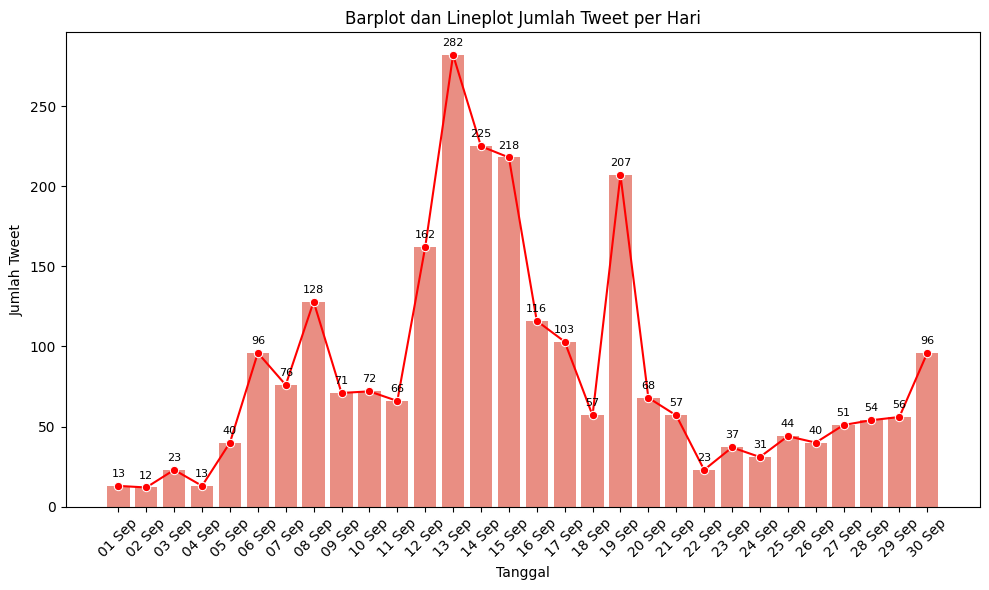

In [32]:
# Create a figure with one axis
fig, ax = plt.subplots(figsize=(10, 6))

# Barplot
sns.barplot(x='tanggal', y='size', data=tweet_per_hari, ax=ax, color='salmon')

# Lineplot on top of the barplot
sns.lineplot(x='tanggal', y='size', data=tweet_per_hari, ax=ax, color='red', marker='o')

# Annotate the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menghapus desimal dan mengubah ke integer
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',  # Posisikan tepat di atas bar
                fontsize=8, color='black',  # Ukuran font lebih kecil
                xytext=(0, 5), textcoords='offset points')  # Jarak sedikit di atas bar

# Add labels and title
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah Tweet')
ax.set_title('Barplot dan Lineplot Jumlah Tweet per Hari')

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.tight_layout()
plt.show()

Interpretasi:

- Isu naturalisasi pemain timnas mulai ramai dibahas khususnya di media sosial Twitter (X) pada bulan September, yang dipicu oleh laga kualifikasi Piala Dunia (5 dan 10 September).

- Lonjakan besar terjadi pada 12 September (162 tweet) dan 13 September (282 tweet) karena statement yang dikeluarkan oleh peter gontha menunjukkan ketidaksetujuan terhadap kebijakan PSSI terkait naturalisasi Timnas.

### Tagar Populer

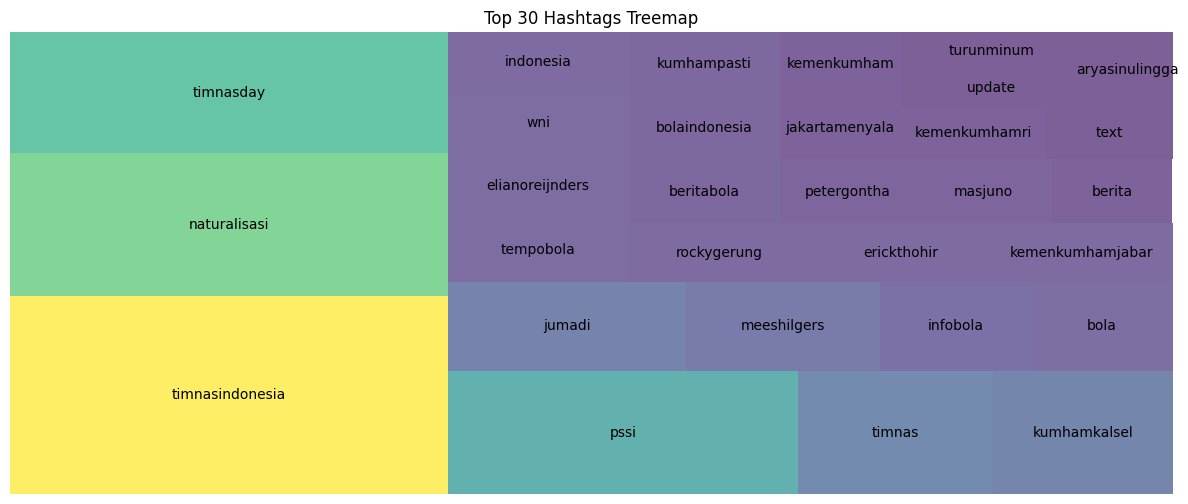

In [33]:
# Menggabungkan semua hashtag ke dalam satu list besar
all_hashtags = [hashtag for sublist in df_final['hastag_in_teks'] for hashtag in sublist]

# Menghitung frekuensi hashtag
hashtag_counts = Counter(all_hashtags)

# Mengonversi ke DataFrame untuk visualisasi
hashtag_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count'])

# Mengambil 30 hashtag terbanyak
hashtag_df = hashtag_df.nlargest(30, 'Count')

# Membuat treemap
plt.figure(figsize=(15, 6))
squarify.plot(sizes=hashtag_df['Count'], label=hashtag_df['Hashtag'], alpha=0.7, color=plt.cm.viridis(hashtag_df['Count'] / max(hashtag_df['Count'])))

# Menambahkan judul dan label
plt.title('Top 30 Hashtags Treemap')
plt.axis('off')  # Menonaktifkan axis

# Tampilkan plot
plt.show()

Interpretasi:

Tagar populer #timnasday, #naturalisasi, dan #timnasindonesia mencerminkan pembahasan isu naturalisasi pemain dalam konteks antusiasme dan dukungan terhadap timnas Indonesia selama pertandingan.


### Visualisasi Jaringan Sosial Netizen X

In [34]:
import networkx as nx
# Draw the Tweet Graph
G=nx.Graph()
for i, tweet in tqdm(df_final.iterrows()):
    if tweet.username not in G.nodes():
        G.add_node(tweet.username)
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", tweet['full_text'])
    for mention in mentionS:
        if "." not in mention: #skipping emails
            usr = mention.replace("@",'').strip()
            if usr not in G.nodes():
                G.add_node(usr)
            G.add_edge(tweet.username, usr)
Nn=G.number_of_nodes();Ne=G.number_of_edges()
print('Finished. There are %d nodes and %d edges in the Graph.' %(Nn,Ne))

2537it [00:00, 5132.36it/s]

Finished. There are 2234 nodes and 1852 edges in the Graph.


In [35]:
import networkx as nx

# Ekspor graf ke file GraphML untuk nantinya diproses dalam software Gephi
nx.write_graphml(G, "twitter_graph_timnas.graphml")


In [36]:
# hasil output dari Gephi di upload ke dalam link drive pada url berikut
# https://drive.google.com/file/d/1MjrTWYewA_JNedDIQK4WYpCO5H6d-aRk/view?usp=drive_link

import requests
# Tautan unduhan langsung
id = "1MjrTWYewA_JNedDIQK4WYpCO5H6d-aRk"
url = f"https://drive.google.com/uc?id={id}"
output_path = "/content/graph.svg"

# Unduh file
response = requests.get(url)
with open(output_path, "wb") as file:
    file.write(response.content)

print(f"File SVG berhasil diunduh: {output_path}")

File SVG berhasil diunduh: /content/graph.svg


In [37]:
# Menampilkan Hasil Output
from IPython.display import HTML

# Path ke file SVG
svg_path = "/content/graph.svg"

# Baca isi file SVG
with open(svg_path, "r") as file:
    svg_content = file.read()

# HTML dengan slider dan SVG otomatis berada di tengah
html_content_with_centering = f"""<div style="border: 1px solid black; width: 200vh; height: 175vh; display: flex; flex-direction: column; align-items: center; justify-content: center; overflow: hidden;">
    <div id="svgContainer" style="display: flex; justify-content: center; align-items: center; transform: scale(0.45); transform-origin: center;">
        {svg_content}
    </div>
</div>
"""

# Tampilkan dengan centering dan margin top
display(HTML(html_content_with_centering))

Interpretasi:

Berdasarkan analisis jaringan, beberapa akun Twitter (X) dengan degree tertinggi sering disebut atau di-reply dalam diskusi terkait topik naturalisasi pemain sepak bola. Akun-akun tersebut dapat dikelompokkan berdasarkan peran mereka:

- Akun media: Akun seperti idextratime, indostransfer, gilabola, panditfootball, sukanyepak, dan kegblgunfaedh berperan sebagai pusat penyebaran informasi. Mereka menjadi referensi utama bagi Netizen.

- Tokoh sentral: ErickThohir dan PeterGontha sering menjadi subjek pembicaraan.

- Akun pribadi aktif: Akun seperti pangeransiahaan, pray_thekid, dan FahmiAgustian  memberikan pandangan atau tanggapan yang menarik perhatian diskusi.

Narasi yang muncul dalam pembicaraan ini mencakup beberapa tema utama, yaitu:

1. Rasa bangga masyarakat terhadap performa Timnas Indonesia, terutama setelah kehadiran pemain naturalisasi.
2. Kritik terhadap kebijakan naturalisasi, termasuk dari pengamat sepak bola dan Peter Gontha, yang mempertanyakan langkah PSSI di bawah kepemimpinan Erick Thohir.
3. Informasi tentang calon pemain baru, yang menjadi daya tarik utama bagi diskusi di antara pengguna Twitter.
4. Perbandingan internasional, di mana muncul opini bahwa Timnas Indonesia memiliki keunggulan dibandingkan negara lain.


In [38]:
# Diperoleh beberapa akun dengan mention terbanyak (dilihat dari degree yang besar)
list_akun = ['kegblgnunfaedh','erickthohir','Indostransfer','gilabola', 'pangeransiahaan','panditfootball','idextratime','sukanyepak','PeterGontha','FahmiAgustian','pray'] # akun yang ingin diperiksa

# Mencari tweet yang melakukan mention yang kemudian akan diperoleh tweet apa yang di-reply oleh Netizen X
for i in range(len(list_akun)):
    print(f"[{list_akun[i]}]")
    nama_akun = list_akun[i]
    isi_tweet = df_final[df_final['full_text'].str.contains('@'+nama_akun, case=False, na=False)].head(5) # head untuk kustomisasi jumlah tweet yang ditarik
    listtweet = list(isi_tweet['full_text'])
    listurltweet = list(isi_tweet['tweet_url'])
    for j in range(len(listtweet)):
       print(f"{j+1}. Link [{listurltweet[j]}] : {listtweet[j]}")

[kegblgnunfaedh]
1. Link [https://x.com/aryyyyymaulanaa/status/1834912776005075192] : @kegblgnunfaedh yang dikritik si batu ini adalah kurangnya perhatian pelatihan para atlit sehingga harus ambil pemain naturalisasi. naturalisasi memang jalan pintas tapi gak salah juga ko lagipula pemain yang diambil punya keturunan Indonesia
2. Link [https://x.com/Fauziahmdb/status/1834966011004830179] : @restafajri @kegblgnunfaedh Menurut gw salah sih dia cuma liat timnas senior dia mengatakan regenerasi nyatanya u17 u20 dan U23 kita cukup membanggakan rata pemain kita itu karirnya abis di umur 25 keatas yg seharusnya jadi masa emasnya pemain bola tujuan naturalisasi ini supaya Indonesia dilirik-
3. Link [https://x.com/heruwicaksono41/status/1834966384037753103] : @kegblgnunfaedh Seoranf politik gak pantes komen tentang sepak bola yg bukan di bidangnya timnas kita mau maju di jatuhin sma orang kita lgi pula mreka yg naturalisasi ada darah indonesia sah sesuai undang gw tau prancis sepak bola nya heb

## Visualisasi (Analisis Sentimen)

In [39]:
# Membuat dataframe baru tanpa duplikasi berdasarkan teks untuk analisis sentimen
# Agar tidak dipengaruhi oleh adanya spam ataupun buzzer
df2 = df_final.drop_duplicates(subset=['teks_rapih'])
df2.shape

(2350, 18)

### Pie chart sentimen

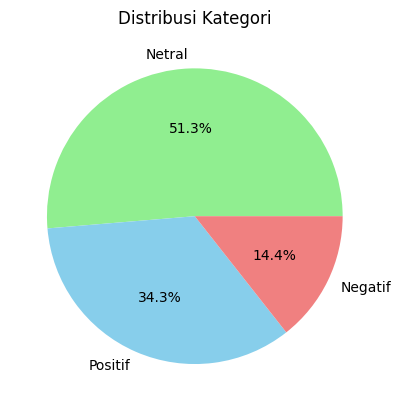

In [40]:
# Menghitung distribusi kategori
category_counts = df2['sentiment_label'].value_counts()

# Membuat pie chart
category_counts.plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'skyblue', 'lightcoral'])

# Menambahkan judul
plt.title('Distribusi Kategori')

# Menampilkan chart
plt.ylabel('')  # Menghilangkan label y agar lebih rapi
plt.show()

Interpretasi:

- Positif (34.3%)
1. Keturunan Indonesia memiliki hak untuk membela Timnas
2. Proses naturalisasi diakui secara aturan
3. Naturalisasi menambah kualitas Timnas

- Negatif (14.4%)
1. Kegagalan dalam pembinaan pemain lokal
2. Ketergantungan pada pemain asing
3. Ketidakseimbangan antara pemain lokal dan pemain naturalisasi

### Word Cloud

In [41]:
# Mengolah kembali stopword, karena terdapat kata-kata baru yang mengganggu Word Cloud
# Hal ini di karenakan kata-kata tersebut muncul di semua kategori (di permasalahan sentimen)
# stopword khusus
stopword_nat = {'timnas indonesia','main timnas','indonesia','main naturalisasi','naturalisasi','sepak bola',
                'main','main turun','timnas','sepak','bola','sih','yg','u','iya','orang','nya','turun','keturunan',
                'lokal','negara','darah','bangga','liga','maju','warga','pakai','tim','belanda'}


In [42]:
# Fungsi Pembersih stopword
def clean_text(text, stopwords):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()

    # Tokenisasi menggunakan TextBlob
    tokens = TextBlob(text).words

    # Menghapus stopwords
    filtered_tokens = [token for token in tokens if token not in stopwords]

    # Menggabungkan kembali token menjadi teks
    return ' '.join(filtered_tokens)

# Membuat kolom baru tanpa stopword khusus
df2['stem_teksnew'] = df2['stem_teks'].apply(lambda x: clean_text(x, stopword_nat))

<ipython-input-42-4b36c4f0a3dd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['stem_teksnew'] = df2['stem_teks'].apply(lambda x: clean_text(x, stopword_nat))


In [43]:
# Fungsi untuk memanggil baris yang mengandung beberapa keyword
def filter_teks_multi_kata(df2, kolom, kata_kunci):
    # Membuat filter untuk semua kata kunci
    mask = df2[kolom].str.contains(kata_kunci[0], case=False, na=False)
    for kata in kata_kunci[1:]:
        mask &= df2[kolom].str.contains(kata, case=False, na=False)
    return df2[mask]

#### WC sentimen positif

In [44]:
dfpos = df2[df2['sentiment']==3]

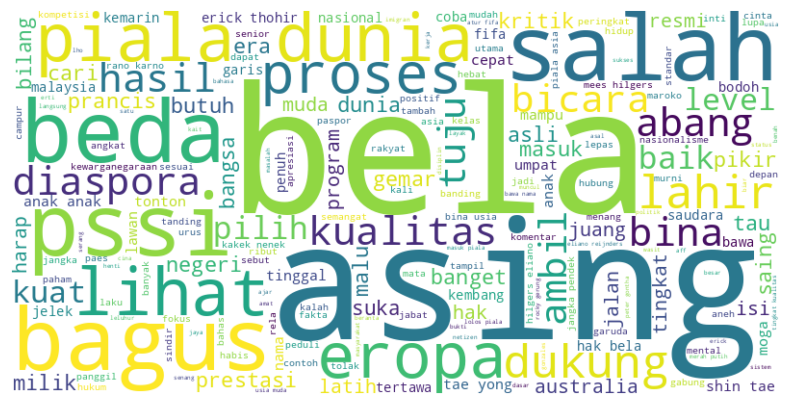

In [45]:
# Gabungkan kolom teks jika ada
text = " ".join(dfpos['stem_teksnew'])

# Generate dan tampilkan word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Interpretasi:

Beberapa kata yang paling digunakan adalah ‘bela’, ‘asing’, ‘bagus’, salah’, ‘beda’, dan sebagainya. Netizen berpendapat bahwa naturalisasi sah secara aturan dan pemain asing keturunan Indonesia berhak membela timnas. Hal ini juga dianggap baik dalam upaya meningkatkan kualitas timnas.

In [46]:
# melihat isi tweet berdasarkan beberapa kata kunci yang besar
dfposwhat = filter_teks_multi_kata(dfpos, 'stem_teksnew', ['bela','asing'])
listpos = list(dfposwhat['full_text'])
listurlpos = list(dfposwhat['tweet_url'])
for i in range(len(listpos)):
  print(f"{i+1}. Link [{listurlpos[i]}] : {listpos[i]}")

1. Link [https://x.com/rndmaulana/status/1834130219177050386] : @Indostransfer Maluu? Mereka semua pemain keturunan mereka ada darah indonesia mereka berhak membela negerinya sendiri. Agak sakit sih pas baca bagian bangsa asing padahal jelas orang tua/kakek nenek mereka orang indonesia. Tapi ya mau gmna semoga sepakbola diindonesia segera mulai dirapihkan
2. Link [https://x.com/AuliaZlatan/status/1834206645003714941] : @garistengah_id makanya di eropa ga jarang kita sering melihat pemain bola yg bersaudara tapi beda membela negara. itu semua karena ada faktor Darah keturunan/Naturalisasi. ga semata2 orang bule main di timnas dibilang naturalisasi siapa tau dari silsilah nya memang keturunan King INDONESIA.
3. Link [https://x.com/ahcinomanirbev/status/1834626049357009120] : Pan Pon Pan Pon noooh seluruh perhatian mah ke naturalisasi pemain asing timnas. Mungkin atlit PON juga harus cari yang mau dinaturalisasi buat bela Indonesia baru dah makannya rasa hotel bintang sepuluh.
4. Link [ht

In [47]:
# melihat isi tweet  berdasarkan beberapa kata kunci yang besar
dfposwhat2 = filter_teks_multi_kata(dfpos, 'stem_teksnew', ['salah','dukung'])
listpos2 = list(dfposwhat2['full_text'])
listurlpos2 = list(dfposwhat2['tweet_url'])
for i in range(len(listpos2)):
  print(f"{i+1}. Link [{listurlpos2[i]}] : {listpos2[i]}")

1. Link [https://x.com/NATHANPROTECT/status/1833437298844918128] : Masih menyayangkan ada yg bilang &amp; mengkotak kotakkan naturalisasi &amp; lokal Apa yg salah?? Mereka WNI mereka punya dokumen sbg WNI mereka semua timnas Indonesia mereka sama dpt porsi yg sama Harusnya gk ada komen begitu lebih baik support as team as Indonesia
2. Link [https://x.com/jen75088/status/1834255544019755356] : kayak g habis pikir ada orang kayak gitugue bakal dukung pemanggilan pemain keturunan buat naturalisasi di Indonesia dan pembinaan pemain salah satunya bisa melalui main abroad dan peringkat fifa kita harus naik buat itu
3. Link [https://x.com/AS76509428/status/1834689120863764511] : @pangeransiahaan Selama bisa bikin nama indonesia ada di pildun ITU SEMUA SAH DAN NGGAK NYALAHIN ATURAN mau lokal mau pemain keturunan persetan dg itu.. Tinggal diem dan dukung ngga bacot a b c ..
4. Link [https://x.com/IndonesiaF56951/status/1835461200840368171] : @FahmiAgustian Pro &amp; kontra naturalisasi pasti ad

#### WC Sentimen Negatif

In [48]:
dfneg = df2[df2['sentiment']==1]

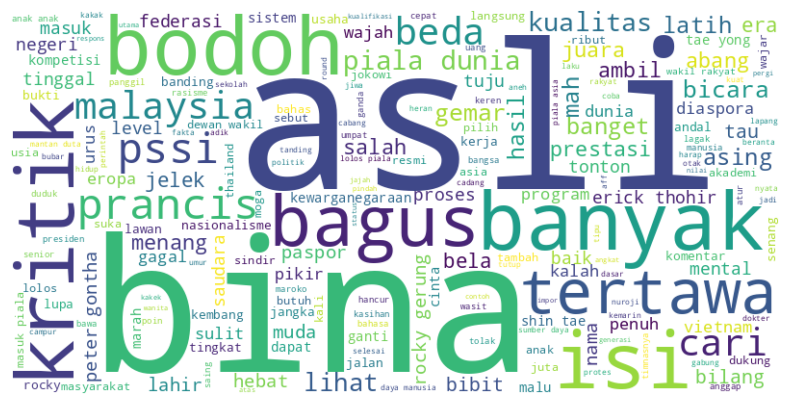

In [49]:
# Gabungkan kolom teks jika ada
text = " ".join(dfneg['stem_teksnew'])

# Generate dan tampilkan word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Interpretasi:

Beberapa kata yang paling digunakan adalah ‘asli’, ‘bina’, ‘banyak’, kritik’, ‘bodoh’, dan sebagainya. Netizen merasa tidak puas terhadap pengembangan pemain lokal (asli Indonesia) dan cemas terhadap identitas timnas yang bergantung pada pemain asing. Netizen juga menyerukan pembinaan yang lebih baik untuk penguatan identitas nasional timnas Indonesia.

In [50]:
# melihat isi tweet berdasarkan beberapa kata kunci yang besar
dfnegwhat = filter_teks_multi_kata(dfneg, 'stem_teksnew', ['bina','banyak'])
listneg = list(dfnegwhat['full_text'])
listurlneg = list(dfnegwhat['tweet_url'])
for i in range(len(listneg)):
  print(f"{i+1}. Link [{listurlneg[i]}] : {listneg[i]}")

1. Link [https://x.com/fredyjuniartz/status/1833720013582196792] : @dribble9 Timnas sekarang perbanyak naturalisasi liga sekarang pake 8 pemain asing kompetisi yo cuman 1 piala Indonesia gak ada pembinaan? Yo mampus bang
2. Link [https://x.com/Sh4d4mhu53n/status/1835150344852324457] : @03__nakula @erickthohir Emang udh paling bener yg ngisi Timnas lebih dibanyakin pemain keturunan aja cuma pemain yg full indo yg punya kualitas terbaik yg ngisi timnas Pemain Liga Indonesia yg msh punya jiwa beladiri sok jagoan dilapangan dibuang aja jauh2.. Pembinaan Memble. Pengurus Goblok.
3. Link [https://x.com/ikd2009/status/1835274142708597094] : @kegblgnunfaedh Setuju...kalaupun timnas bola indonesia levelnya meningkat karena banyaknya pemain naturalisasi itu bukan sebuah keberhasilan menurut sy tapi kegagalan melakukan pembinaan
4. Link [https://x.com/apasajalah_11/status/1836218678255427914] : @GanesWilly78549 @Bali_Football Soal pengamat dan pihak yang sok kritisi pemain keturunan mereka sudah 

In [51]:
# melihat isi tweet berdasarkan beberapa kata kunci yang besar
dfnegwhat2 = filter_teks_multi_kata(dfneg, 'stem_teksnew', ['asli','isi'])
listneg2 = list(dfnegwhat2['full_text'])
listurlneg2 = list(dfnegwhat2['tweet_url'])
for i in range(len(listneg2)):
  print(f"{i+1}. Link [{listurlneg2[i]}] : {listneg2[i]}")

1. Link [https://x.com/GabunganL927/status/1834851580941943240] : @msaid_didu @PeterGontha sangat sependapat dgn pak peter. trus apakah kalian bangga dgn timnas (naturalisasi) sekarang? Terusterang aku Tidak...! Sejelek-jelek timnas asli indonesia aku lebih suka... Hanyasaja perlu profesional dlm rekrutmen dan latihan fisik.
2. Link [https://x.com/jeff23greenwood/status/1835318191347884258] : @speakbola_id @kegblgnunfaedh Emg ga ada yg larang dan negara2 lain pun melakukan. Dia kan bicara soal idealisme bagaimana layaknya timnas itu isinya ya org2 nasional Indonesia asli (selayaknya begitu) ya kalo timnas isinya naturalisasi semua ya ini jd kek joki doang tapi resmi
3. Link [https://x.com/PickNavaHOi/status/1840355491442315617] : @Cemen11388788 ya' maklum isinya 90% pemain ASLI Indonesia + bule (keturunan kompeni) cuma ada 1-2 yg main tapi klo dh sering main bareng bisa sesolid Timnas yg Juara Piala AFF tahun kemaren yg isinya SAMA ; 90% pemain lokal + bule (keturunan) cuma 1-2 klo men

In [52]:
# melihat isi tweet berdasarkan beberapa kata kunci yang besar
dfnegwhat3 = filter_teks_multi_kata(dfneg, 'stem_teksnew', ['rocky','dapat'])
listneg3 = list(dfnegwhat3['full_text'])
listurlneg3 = list(dfnegwhat3['tweet_url'])
for i in range(len(listneg3)):
  print(f"{i+1}. Link [{listurlneg3[i]}] : {listneg3[i]}")

1. Link [https://x.com/RusminPrima/status/1835020686802452604] : @sukanyepak_bola Kali ini saya sependapat dengan bung Rocky dan Peter Gontha..... Jumlah Pemain Naturalisasi yg wajar di starting line-up timnas pada saat bertanding menurut saya paling maksimal 3 pemain naturalisasi bukan sampai 9 pemain.. Jadi timnas Indonesia tapi rasa asing .. Just Opinion..
2. Link [https://x.com/Erenyeager0510/status/1835274364469600522] : @kegblgnunfaedh sependapat dengan pendapat dari pak RG. Adanya naturalisasi di dalam kubu timnas indonesia adalah bukti ketidakmampuan SDM lokal dalam kancah sepak bola.


### Tren Sentimen (September)



In [53]:
# Tentukan event_date
event_date1 = pd.to_datetime('2024-09-05') # Tanggal Laga Pertama Indonesia di Kualifikasi Piala Dunia Putaran ketiga (Indonesia vs Arab)
event_date = pd.to_datetime('2024-09-10') # Tanggal Laga Kedua Indonesia di Kualifikasi Piala Dunia Putaran ketiga (Indonesia vs Australia)

# Fungsi untuk menentukan waktu (before, during, after)
def classify_time(date, event_date,event_date1):
    if date < event_date1: # Sebelum laga pertama
        return 'before'
    elif date.date() > event_date.date(): # Setelah laga kedua
        return 'after'
    else: # dalam interval antara laga pertama dan kedua
        return 'during'

# Terapkan fungsi pada kolom 'Tanggal' dan buat kolom baru 'Waktu'
df2['Waktu'] = df2['created_at'].apply(lambda x: classify_time(x, event_date, event_date1))

<ipython-input-53-ddb8269bc0e4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Waktu'] = df2['created_at'].apply(lambda x: classify_time(x, event_date, event_date1))


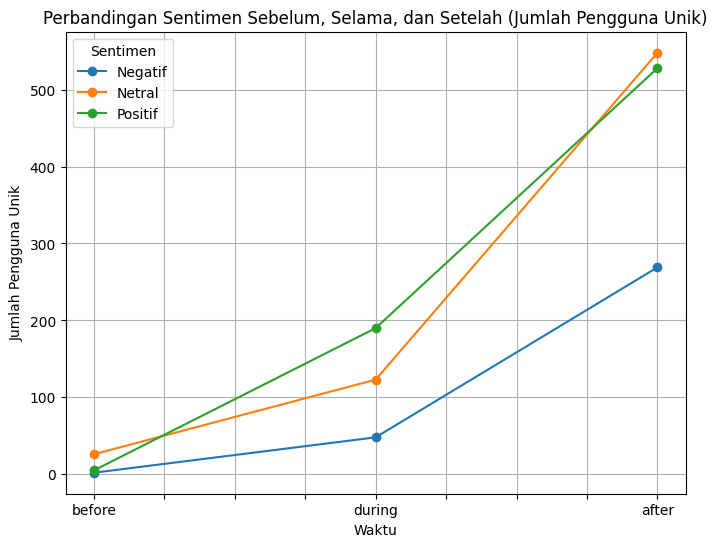

In [54]:
# Menghitung jumlah pengguna unik di setiap kombinasi Waktu dan Sentimen
pivot_data = df2.groupby(['Waktu', 'sentiment_label'])['username'].nunique().unstack(fill_value=0)
desired_order = ['before', 'during', 'after']
pivot_data = pivot_data.reindex(desired_order)

# Membuat line plot dengan jumlah pengguna unik
pivot_data.plot(kind='line', marker='o', figsize=(8, 6))

# Menambahkan judul dan label
plt.title('Perbandingan Sentimen Sebelum, Selama, dan Setelah (Jumlah Pengguna Unik)')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Pengguna Unik')
plt.xticks(rotation=0)
plt.legend(title='Sentimen', loc='upper left')
plt.grid(True)
plt.show()

Interpretasi:

- “Sebelum” (before): Jumlah pengguna dengan sentimen negatif, netral, dan positif relatif rendah. Ini menunjukkan bahwa sebelum pertandingan dimulai, tingkat aktivitas dan opini publik masih belum tinggi.

- “Selama” (during): Sentimen positif meningkat signifikan, diikuti oleh kenaikan sentimen netral dan sedikit peningkatan sentimen negatif. Peningkatan ini mencerminkan respons positif publik terhadap performa timnas selama pertandingan Indonesia vs Arab dan Indonesia vs Australia.

- “Setelah” (after): Peningkatan terbesar terjadi pada setiap sentimen. Hal ini menunjukkan bahwa kedua pertandingan telah menghasilkan peningkatan aktivitas dan diskusi yang signifikan di platform Twitter (X) ini, menunjukkan bahwa dampak signifikan dari kedua pertandingan.

# Kesimpulan

- Isu utama yang dibahas mencakup kegagalan pembinaan pemain lokal, ketergantungan pada pemain asing, dan dampaknya terhadap identitas tim nasional. Di sisi lain, dukungan terhadap kebijakan ini berfokus pada peningkatan kualitas permainan dan hak pemain keturunan untuk membela Timnas Indonesia.
- Sentimen publik didominasi pandangan positif (34,3%), menyoroti manfaat naturalisasi untuk meningkatkan performa tim. Sebagian memiliki sentimen negatif (14,4%), dengan kritik utama pada lemahnya pembinaan pemain lokal. Sentimen netral juga cukup besar, mencerminkan opini berimbang.
- Pola percakapan menunjukkan lonjakan diskusi signifikan pada 12-13 September, dipicu statement yang dikeluarkan oleh peter gontha menunjukkan ketidaksetujuan terhadap kebijakan PSSI terkait naturalisasi Timnas dan antusiasme publik dalam kualifikasi Piala Dunia.
- Respons netizen menunjukkan pandangan yang beragam. Pendukung berpendapat bahwa kebijakan ini sah dan memperkuat Timnas, sementara kritik terutama datang dari kekhawatiran ketergantungan pada pemain asing dan seruan untuk memperbaiki pembinaan pemain lokal.

# Saran

- Pembinaan Pemain Lokal : PSSI perlu meningkatkan program pembinaan usia muda dengan menyediakan fasilitas, pelatihan, dan kompetisi yang berkualitas. Pemerintah dapat mendukung melalui pendanaan dan kebijakan untuk memastikan pemain lokal memiliki peluang yang sama untuk berkembang seperti pemain asing.
- Keseimbangan Kebijakan Naturaliasi : Kebijakan naturalisasi sebaiknya tidak menjadi solusi utama, melainkan pelengkap strategi jangka panjang. PSSI harus tetap memprioritaskan pembinaan pemain lokal sebagai tulang punggung tim nasional sambil menggunakan pemain naturalisasi untuk memperkuat posisi tertentu yang masih kekurangan talenta.
- Peningkatan Transparansi Kebijakan Naturalisasi: Transparansi dalam proses naturalisasi, termasuk alasan memilih pemain tertentu dan dampaknya terhadap tim, akan membantu meredam kritik publik. PSSI dapat mengkomunikasikan tujuan strategis serta kebijakan ini kepada masyarakat dengan lebih jelas. Dan membuat masyarakat lebih terdukasi tentang alasan naturalisasi dan dampaknya dapat memperkuat dukungan terhadap kebijakan ini.
- Pemanfaatan Pemain Naturalisasi sebagai Mentor Pemain Muda : Pelatih dapat mengoptimalkan kehadiran pemain naturalisasi dengan mendorong mereka menjadi mentor bagi pemain muda lokal, sehingga pengalaman dan keterampilan mereka dapat ditransfer kepada generasi berikutnya.
- Kolaborasi Pemerintah dan PSSI : Pemerintah dapat mendukung pembinaan pemain lokal dengan meningkatkan anggaran pengembangan olahraga, memperbaiki infrastruktur sepak bola, dan memastikan pemerataan akses pelatihan di seluruh daerah.

